<h1 style="color:#2192f1" align="center"> LINEAR REGRESSION</h1>


<h2 align="center" style="color:#f0e912">IMPORT LIBRARIES</h2>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from LinearRegression.src.regression import cost_function, gradient_descent, error, h_function
from LinearRegression.src.visualization import plot_weights_trajectory, plot_loss_trajectory, plot_h_function, plot_data

<h2 align="center" style="color:#f0e912">DATA EXPLORATION</h2>


In [3]:
df_train = pd.read_csv("../data/randomly_generated/train.csv")
df_test = pd.read_csv("../data/randomly_generated/test.csv")

In [4]:
df_train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [5]:
df_train["y"].isnull().sum()
# Drop the rows where at least one element is missing
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)

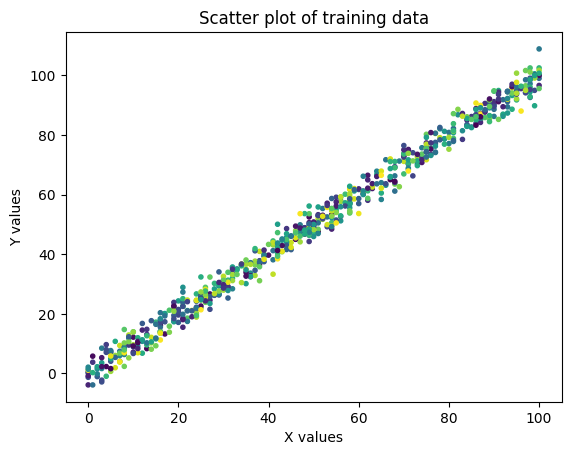

In [6]:
plot_data(df_train["x"], df_train["y"])

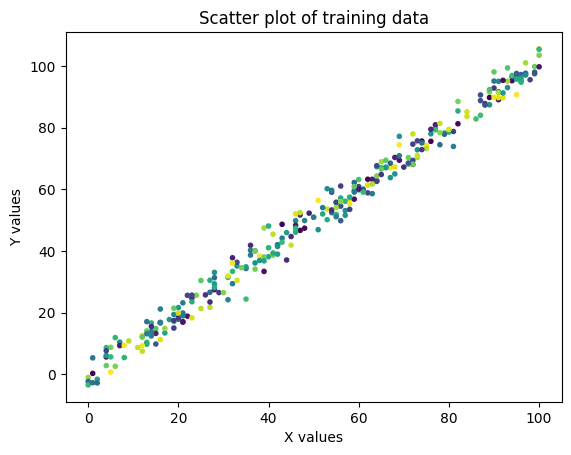

In [7]:
plot_data(df_test["x"], df_test["y"])

In [8]:
# Transform features and target into numpy
X = df_train["x"].values.reshape(-1, 1)
y = df_train["y"].values.reshape(-1, 1)
# Intercept feature
i_term = np.ones((len(X), 1))
# Add intercept feature in other features
X_intercept = np.concatenate((i_term, X), axis=1)

<h2 align="center" style="color:#f0e912">SIMPLE LINEAR REGRESSION</h2>


<h3 align="center" style="color:#5F75BF">TRAINING AND VISUALIZATION</h3>


In [9]:
theta, final_loss, weights_history, loss_history = gradient_descent(X_intercept, y, type="BGD")

Convergence achieved!
Final weights : 
θ₀ = 0.014900157842746719
θ₁ = 0.9981606189503998
Final loss : 3.9364871868853086


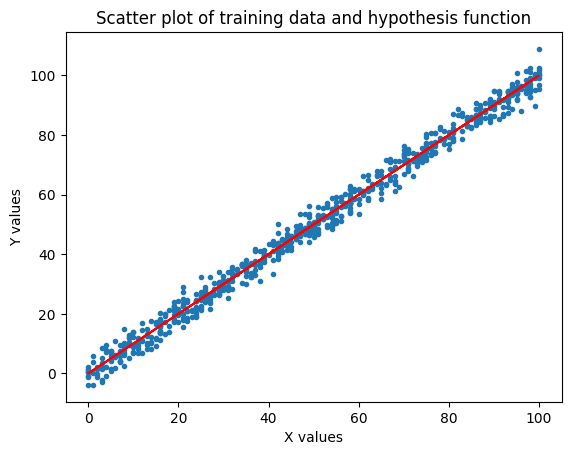

In [10]:
plot_h_function(X, y, X_intercept, theta)

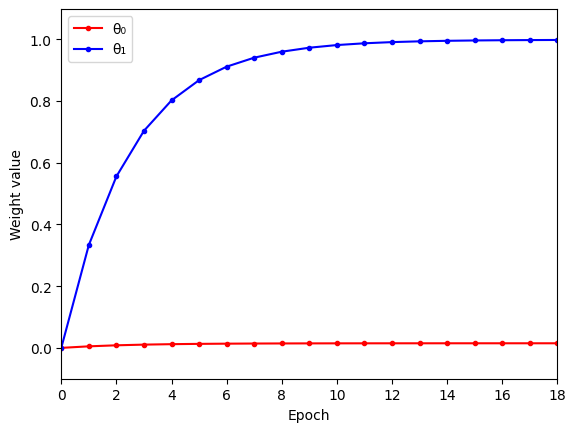

In [11]:
plot_weights_trajectory(weights_history)

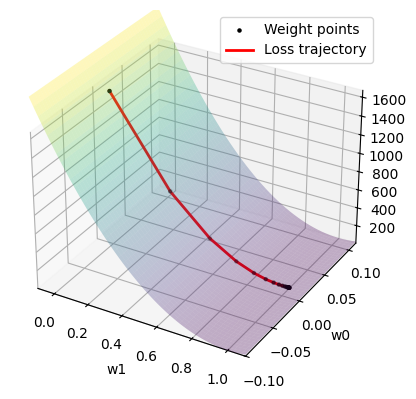

In [12]:
plot_loss_trajectory(weights_history, loss_history, X_intercept, y)

<h3 align="center" style="color:#5F75BF">TESTING AND VISUALIZATION</h3>


In [19]:
# Transform features and target into numpy
X_test = df_test["x"].values.reshape(-1, 1)
y_test = df_test["y"].values.reshape(-1, 1)
# Intercept feature
i_term = np.ones((len(X_test), 1))
# Add intercept feature in other features
X_test_intercept = np.concatenate((i_term, X_test), axis=1)

In [20]:
cost_function(X_test_intercept, y_test, theta)

np.float64(4.748338543290315)

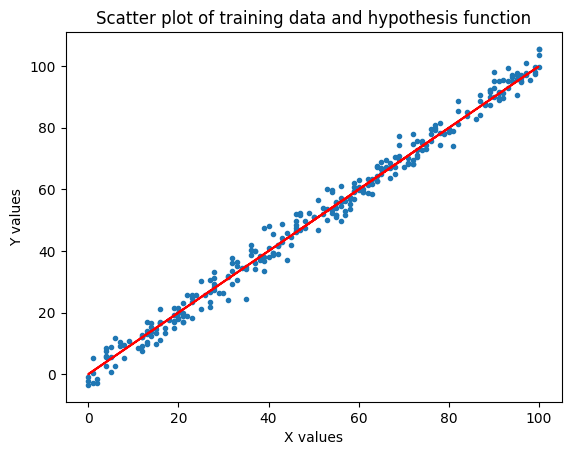

In [21]:
plot_h_function(df_test["x"], df_test["y"], X_test_intercept, theta)

<h2 align="center" style="color:#f0e912">LOCALLY WEIGHTED LINEAR REGRESSION</h2>


In [35]:
# Generate synthetic data
np.random.seed(42)  # for reproducibility

# X values uniformly spaced between -3 and 3
X_lwlr = np.linspace(-3, 3, 100).reshape(-1, 1)

# True function (a nonlinear curve, e.g., sine curve)
y_lwlr= np.sin(X_lwlr) + 0.5 * X_lwlr

# Add some Gaussian noise to simulate real data
noise = np.random.normal(0, 0.3, size=X_lwlr.shape)
y_lwlr = y_lwlr + noise
# Intercept feature
i_term = np.ones((len(X_lwlr), 1))
X_lwlr = np.concatenate((i_term, X_lwlr), axis=1)

In [44]:
rho = 0.1
theta_list = []
for x0 in X_lwlr:
    W = np.zeros((len(X_lwlr), len(X_lwlr)))
    for i in range(len(X_lwlr)):
        W[i, i] = W[i, i] = np.exp(-np.linalg.norm(X_lwlr[i] - x0)**2 / (2 * rho**2))
    theta = np.linalg.inv(X_lwlr.T @ W @ X_lwlr) @ (X_lwlr.T @ W @ y_lwlr)
    theta_list.append(theta)

In [52]:
y_lwlr_pred = [h_function(X_lwlr[i], theta_list[i]) for i in range(len(X_lwlr))]

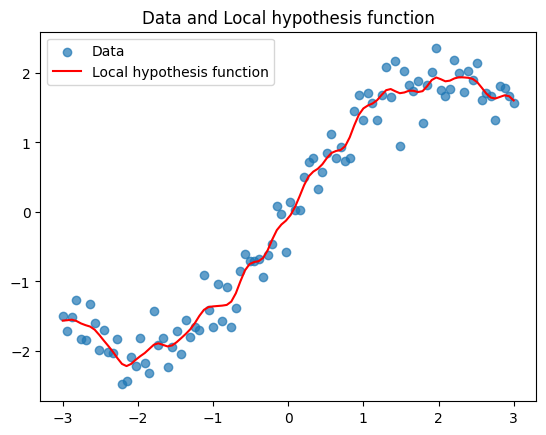

In [60]:
# Plot the generated data
plt.scatter(X_lwlr[:, 1], y_lwlr, label="Data", alpha=0.7)
plt.plot(X_lwlr[:, 1], y_lwlr_pred, color="red", label="Local hypothesis function")
plt.legend()
plt.title("Data and Local hypothesis function")
plt.show()